# Random Forest

In [28]:
import requests as r
import numpy as np
import pandas as pd
import json

import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


ModuleNotFoundError: No module named 'pydot'

In [2]:
moviedata = pd.read_csv('AfterEDA-Cleaning.csv')
moviedata.head(n = 10)

,ID,Title,Age of Movie,Age Category,IMDb,Rotten,Availability,Directors,Genres,Country,Language,Runtime
0,1,The Matrix,23,18+,8.7,87.0,1,Lana Wachowski,Action,United States,English,136.0
1,2,Back to the Future,37,7+,8.5,96.0,1,Robert Zemeckis,Adventure,United States,English,116.0
2,3,Spider-Man: Into the Spider-Verse,4,7+,8.4,97.0,1,Bob Persichetti,Animation,United States,English,117.0
3,4,Raiders of the Lost Ark,41,7+,8.4,95.0,1,Steven Spielberg,Action,United States,English,115.0
4,5,Taxi Driver,46,18+,8.3,95.0,1,Martin Scorsese,Crime,United States,English,114.0
5,6,Room,7,18+,8.1,93.0,1,Lenny Abrahamson,Drama,Ireland,English,118.0
6,7,Monty Python and the Holy Grail,47,7+,8.2,97.0,1,Terry Gilliam,Adventure,United Kingdom,English,91.0
7,8,Indiana Jones and the Last Crusade,33,13+,8.2,88.0,1,Steven Spielberg,Action,United States,English,127.0
8,9,Groundhog Day,29,7+,8.0,96.0,1,Harold Ramis,Comedy,United States,English,101.0
9,10,The King's Speech,12,18+,8.0,95.0,1,Tom Hooper,Biography,United Kingdom,English,118.0


In [3]:
moviedata.describe()

,ID,Age of Movie,IMDb,Rotten,Availability,Runtime
count,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000,4726.000000
mean,2363.500000,15.049937,6.162103,59.498096,1.059670,99.975667
std,1364.423016,13.878385,1.059222,22.423813,0.241325,14.374258
min,1.000000,1.000000,1.100000,2.000000,1.000000,60.000000
25%,1182.250000,5.000000,5.500000,45.000000,1.000000,90.000000
50%,2363.500000,11.000000,6.200000,60.000000,1.000000,98.000000
75%,3544.750000,20.000000,6.900000,76.000000,1.000000,109.000000
max,4726.000000,102.000000,9.000000,100.000000,3.000000,140.000000


In [4]:
EDA_numeric = ["IMDb", "Rotten", "Runtime", "Age of Movie"]

In [5]:
moviedata[EDA_numeric].describe()

,IMDb,Rotten,Runtime,Age of Movie
count,4726.000000,4726.000000,4726.000000,4726.000000
mean,6.162103,59.498096,99.975667,15.049937
std,1.059222,22.423813,14.374258,13.878385
min,1.100000,2.000000,60.000000,1.000000
25%,5.500000,45.000000,90.000000,5.000000
50%,6.200000,60.000000,98.000000,11.000000
75%,6.900000,76.000000,109.000000,20.000000
max,9.000000,100.000000,140.000000,102.000000


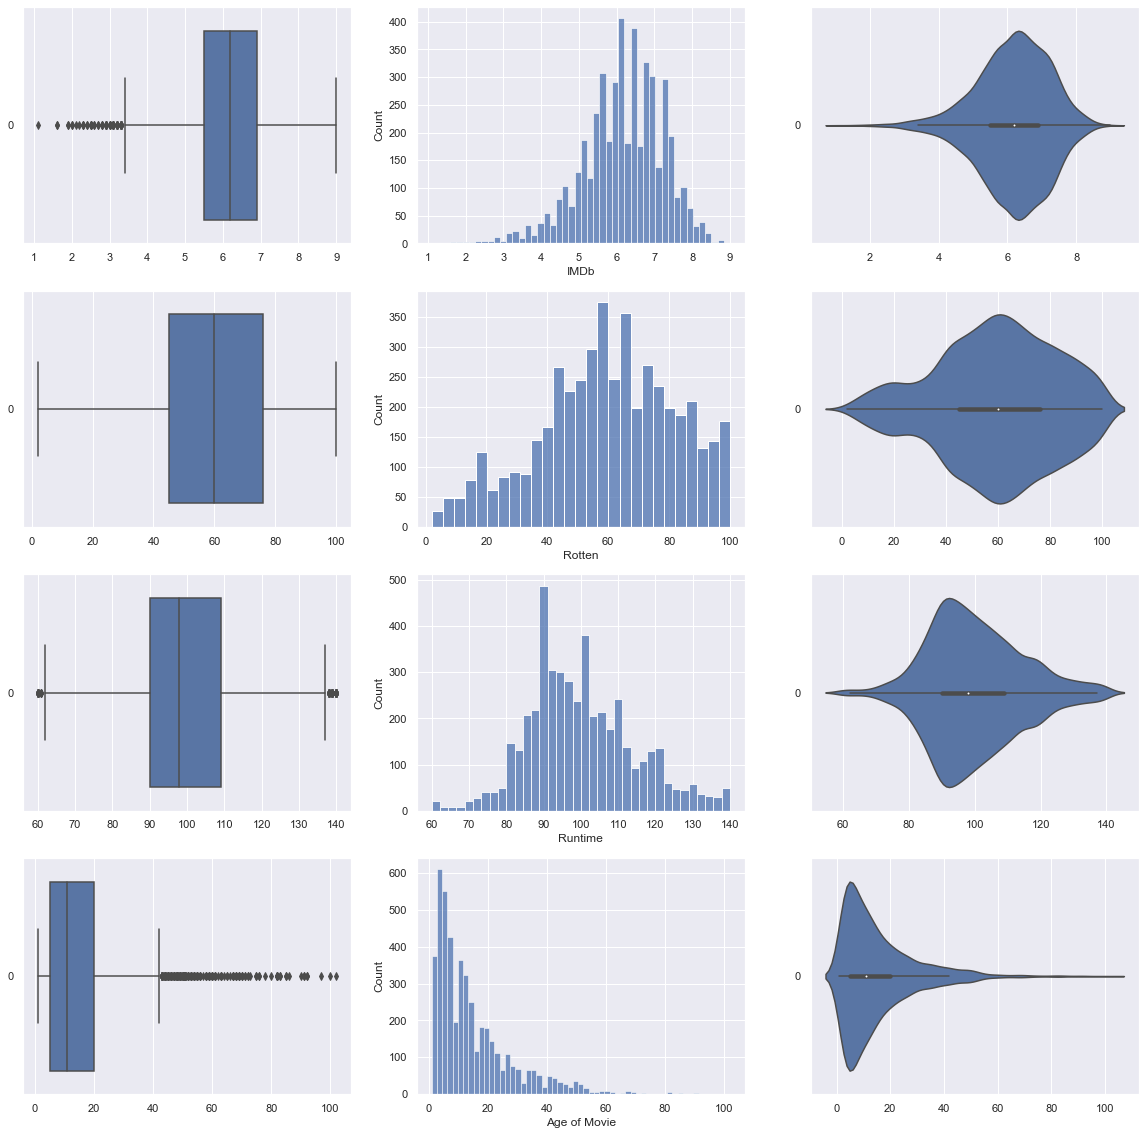

In [6]:
# Draw boxplot, histplot and violinplot of IMDb, Rotten and Runtime
f, axes = plt.subplots(4, 3, figsize=(20, 20))

count = 0
for i in EDA_numeric:
    sb.boxplot(data = moviedata[i], orient = "h", ax = axes[count,0])
    sb.histplot(data = moviedata[i], ax = axes[count,1])
    sb.violinplot(data = moviedata[i], orient = "h", ax = axes[count,2])
    count += 1

## Feature Importance

In [7]:
Feature_df = moviedata[["IMDb", "Rotten", "Runtime", "Age of Movie"]]
a = moviedata["IMDb"]
IMDb_list = []
for i in moviedata["IMDb"]:
    if i >= 7.0:               # Mark good movies with '1' if IMDb >= 7.0
        IMDb_list.append(1) 
    else:                      # Mark bad movies with '0' if IMDb < 7.0
        IMDb_list.append(0)
Feature_df = Feature_df.drop("IMDb", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Feature_df, IMDb_list, test_size = 0.2)

In [8]:
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train) 
accuracy_rf = random_forest.score(X_train, y_train) * 100
print(accuracy_rf, "%")

97.91005291005291 %


In [9]:
# Use K-fold Cross Validation to see how well random forest performs
rf = RandomForestClassifier(n_estimators = 10)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81481481 0.80687831 0.79365079 0.81746032 0.83068783 0.7989418
 0.8015873  0.82010582 0.81216931 0.8042328 ]
Mean: 0.8100529100529101
Standard Deviation: 0.010568774791237138


In [10]:
importance = pd.DataFrame({"Feature": X_train.columns, "Importance": random_forest.feature_importances_})
importance = importance.sort_values("Importance", ascending = False).set_index("Feature")

In [11]:
importance.head()

,Importance
Feature,
Rotten,0.479593
Runtime,0.286020
Age of Movie,0.234387


Conclusion: Rotten Tomatoes Score ('Rotten') is the most important feature. Meanwhile, 'Age of Movie' is the most insignificant one.

### Random Forest Regression

In [12]:
random_forest = RandomForestRegressor() 
X_train, X_test, y_train, y_test = train_test_split(Feature_df, a, test_size = 0.2)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test) 

In [13]:
rf_tuning = RandomForestRegressor(random_state = 20)
param_grid = {
   'n_estimators': [20, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [3,4,5,6,7],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator = rf_tuning, param_grid = param_grid, cv = 5)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [18]:
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Mean Absolute Error (MAE): ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', sklearn.metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error (MAE):  0.6715343413369577
Mean Squared Error (MSE):  0.8047327398295557


In [19]:
random_forest_out_of_bag = RandomForestRegressor(oob_score = True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

0.33704172956269873


Test values are red and Predicted values are green


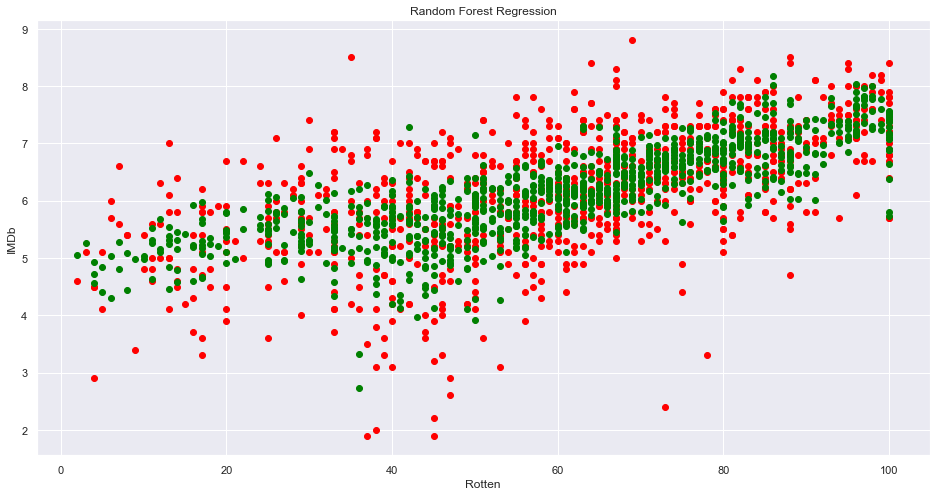

In [22]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Rotten'].values, y_test, color = 'red')
plt.scatter(X_test['Rotten'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Rotten')
plt.ylabel('IMDb')
print("Test values are red and Predicted values are green")
plt.show()

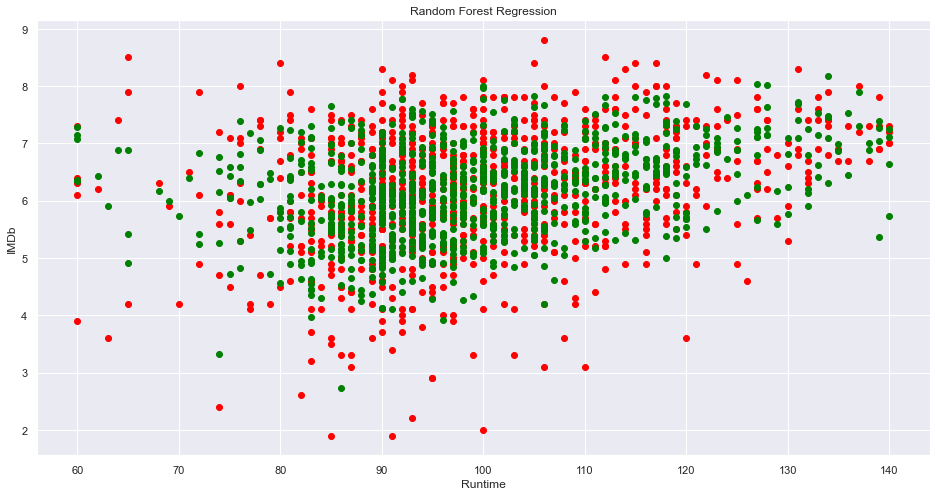

In [23]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Runtime'].values, y_test, color = 'red')
plt.scatter(X_test['Runtime'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Runtime')
plt.ylabel('IMDb')
plt.show()

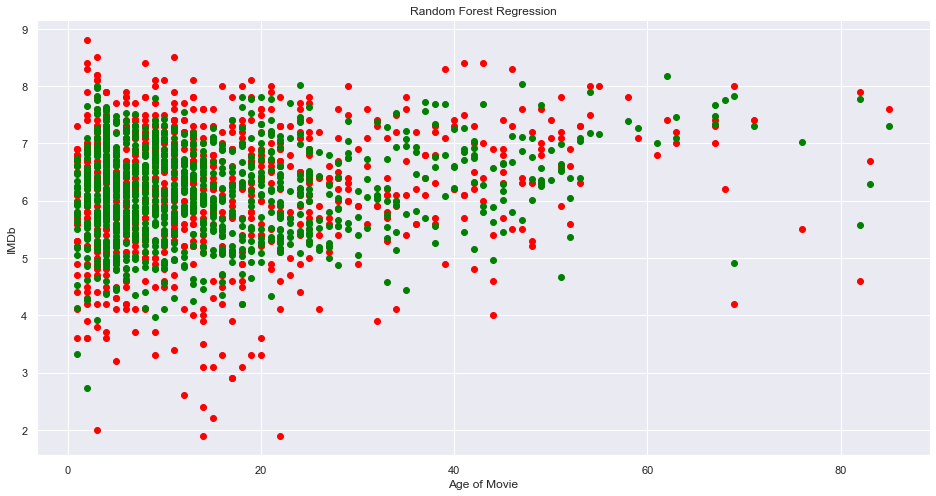

In [24]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test['Age of Movie'].values, y_test, color = 'red')
plt.scatter(X_test['Age of Movie'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Age of Movie')
plt.ylabel('IMDb')
plt.show()

In [25]:
tree = random_forest.estimators_[5]

In [26]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

NameError: name 'export_graphviz' is not defined